In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data exploration and Cleaning
Suppose you want to build a model to predict the selling price for a home in Socal. You find a dataset which contains current and closed listings. 

The data is stored as a .csv file. CSV stands for Comma-Seperated Values, meaning that each attribute is seperated with a comma.

In python we use the library to read in .csv files into a structure called a dataframe.

In [32]:
df = pd.read_csv('./socalhousing.csv') #stored in what is called a dataframe

Pandas is packed with lots of useful data exploration commands, we can see the first few rows with .head()

In [33]:
df.head()

street             city  bed  bath   price    status  sqft
0  1317 Van Buren Avenue  Salton City, CA    3   2.0  201900   pending  1560
1         124 C Street W      Brawley, CA    3   2.0  228500      sold   713
2        2304 Clark Road     Imperial, CA    3   1.0  273950  for sale   800
3     755 Brawley Avenue      Brawley, CA    3   1.0  350000  for sale  1082
4  2207 R Carrillo Court     Calexico, CA    4   3.0  385100   pending  2547

Other useful tools are describe(), hist(), and info() methods. Try each of them and see their functionality in the code cell below.

In [34]:
# Try describe(), hist(), and info() functions

df.describe()

bed          bath         price          sqft
count  15474.000000  15474.000000  1.547400e+04  15474.000000
mean       3.506398      2.453251  7.031209e+05   2173.913209
std        1.034838      0.958742  3.769762e+05   1025.339617
min        1.000000      0.000000  1.950000e+05    280.000000
25%        3.000000      2.000000  4.450000e+05   1426.000000
50%        3.000000      2.100000  6.390000e+05   1951.000000
75%        4.000000      3.000000  8.349750e+05   2737.750000
max       12.000000     36.000000  2.000000e+06  17667.000000

In the following code cell, plot histogram of the 'sqft' column. You can use hist() function or distplot() from seaborn module.

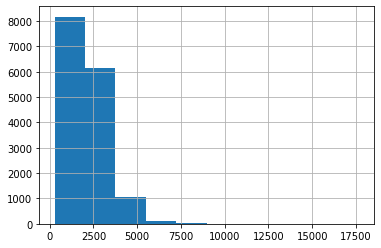

In [35]:
# Plot histogram of the sqft column
df['sqft'].hist()

As you can see the min bathroom count is 0 and max is 36, let's investigate further to see if this is an error.

#### Removing faulty rows

In [36]:
# all that have 0 baths
df[df['bath'] == 0]

street                    city  ...    status  sqft
3459       13481 Saint Andrews          Seal Beach, CA  ...      sold   900
3603       715 Avenida Columbo        San Clemente, CA  ...   pending  1300
3639       715 Avenida Columbo        San Clemente, CA  ...   pending  1300
5686   62646 N Starcross Drive  Desert Hot Springs, CA  ...      sold  2009
9185         159 Velwood Drive            Redlands, CA  ...      sold  1648
9365         159 Velwood Drive            Redlands, CA  ...      sold  1648
14542        401 Walbridge Way                Ojai, CA  ...   pending  3000
14798      39 Margarita Avenue           Camarillo, CA  ...      sold  1430
14810      39 Margarita Avenue           Camarillo, CA  ...  for sale  1430
15390        1475 Forest Drive         Santa Paula, CA  ...  for sale  2625
15391        1445 Forest Drive         Santa Paula, CA  ...      sold  2924

[11 rows x 7 columns]

In [37]:
# Find all that have 5 more baths than beds ()
df[df['bath'] - 5 >= df['bed']]

street           city  bed  bath   price    status  sqft
714  45439 Gingham Avenue  Lancaster, CA    4  36.0  240000   pending  1229
778   37809 Rudall Avenue   Palmdale, CA    4  13.0  299000  for sale  1836

Lets drop all these rows.

In [38]:
indexes= df[ df['bath'] == 0 ].index
df.drop(indexes, inplace=True)

In [39]:
df[df['bath'] == 0]

Empty DataFrame
Columns: [street, city, bed, bath, price, status, sqft]
Index: []

In [40]:
# Let's also drop rows with # bath > # bed + 5 (that's pretty irregular, unless you have >20 bedrooms)
indexes = df[df['bath'] - df['bed'] > 5].index
df.drop(indexes, inplace=True)
df[df['bath'] - 5 >= df['bed']]

Empty DataFrame
Columns: [street, city, bed, bath, price, status, sqft]
Index: []

Now let's see our .describe() once again. Much more reasonable data.

In [41]:
df.describe()

bed          bath         price          sqft
count  15461.000000  15461.000000  1.546100e+04  15461.000000
mean       3.506759      2.452144  7.032943e+05   2174.235431
std        1.034919      0.914159  3.769964e+05   1025.540600
min        1.000000      0.100000  1.950000e+05    280.000000
25%        3.000000      2.000000  4.450000e+05   1426.000000
50%        3.000000      2.100000  6.390000e+05   1952.000000
75%        4.000000      3.000000  8.350000e+05   2738.000000
max       12.000000     11.200000  2.000000e+06  17667.000000

From looking at the data we see there are 7 different attribute (1 of which we are trying to predict)
 - street address
 - city 
 - bedroom count
 - bathroom count
 - sqft
 - price
 - status
 

Assume we only want to use the following columns:

- city
- bedroom count
- bathroom count
- sqft


The status column describes whether a house is sold, pending, or for sale.

Since we want to predict only sell prices, we only care about the values for the houses that have been sold, or are pending to be sold. 

We need to drop the rows for the houses still for sale.

We also need to drop the street column and status column as they will not be used in our model.

In [55]:
indexes= df[ df['status'] == 'for sale' ].index
df.drop(indexes, inplace=True)

# We don't need the status column anymore
# We aren't using the street col, so let's remove it
df = df.drop(columns=['status', 'street'])

df.head()

city  bed  bath   price  sqft
0  Salton City, CA    3   2.0  201900  1560
1      Brawley, CA    3   2.0  228500   713
4     Calexico, CA    4   3.0  385100  2547
5      Brawley, CA    3   1.0  350000  1082
7      Brawley, CA    5   2.1  545000  2600

Now we dropped all the unimportant rows in our data.

All of these features seem crucial to determine selling price for a home. However, machine learning models only operate on numbers, we need to convert these columns to numerical values before we can use it! 

Lets start on the city!


#### Numerical data from categorical city data

In [56]:
df['city'].describe()

count             10316
unique              398
top       San Diego, CA
freq                479
Name: city, dtype: object

Notice that we have 10316 rows but only 398 unique values, this is analogous to your data having 398 different classes, we need to turn this into numbers to continue.


In [60]:
# Generate a dictionary that maps all unique cities to a unique id
city_dict = {city_name:i for i,city_name in enumerate(df['city'].unique())} 

In [67]:
# Uses the city dictionary to retrieve the id
def integer_encode_city_name(city_name):
    return city_dict[city_name]

In [73]:
# Apply the function to the city column and store in new column called city_num
#for city_name in city_dict:
    #print("\"%s\" is %d" % (city_name, integer_encode_city_name(city_name)))
df['city_num'] = df['city'].apply(integer_encode_city_name)


Now our df looks like this, notice how Brawly, CA mapped to 1.

In [74]:
df.head()

city  bed  bath   price  sqft  city_num
0  Salton City, CA    3   2.0  201900  1560         0
1      Brawley, CA    3   2.0  228500   713         1
4     Calexico, CA    4   3.0  385100  2547         2
5      Brawley, CA    3   1.0  350000  1082         1
7      Brawley, CA    5   2.1  545000  2600         1

Keep in mind that this sort of integer encoding is not great for categorical data since the model might learn arbritrary correlations between the city number and price, etc. So now we can one-hot-encode this in order to avoid these problems!

In [75]:
# Let's drop the city column since we no longer need it
df = df.drop(columns=["city"])

In [76]:
df.head()

bed  bath   price  sqft  city_num
0    3   2.0  201900  1560         0
1    3   2.0  228500   713         1
4    4   3.0  385100  2547         2
5    3   1.0  350000  1082         1
7    5   2.1  545000  2600         1

In [78]:
# add one-hot encoding
# Use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['city_num'], prefix='city_num')],axis=1)

# Now drop the original column (you don't need it anymore)
df.drop(['city_num'],axis=1, inplace=True)
df.head()

bed  bath   price  ...  city_num_395  city_num_396  city_num_397
0    3   2.0  201900  ...             0             0             0
1    3   2.0  228500  ...             0             0             0
4    4   3.0  385100  ...             0             0             0
5    3   1.0  350000  ...             0             0             0
7    5   2.1  545000  ...             0             0             0

[5 rows x 800 columns]

Now our data is all numerical!

### Feature Engineering
We can often create our own features from the data we have if we think we can add some important information that the model then doesn't have to spend time learning.

For example, **price per square foot** or **bath to bed ratio** are two pretty good features that may help with price prediction.

Adding these in as inputs may seem redundant, but it also means the model doesn't have to learn these functions, which can speed up training.

Let's add the price per square foot column.

In [79]:
# Add price per square foot column
df['ppsqft'] = df['price'] / df['sqft']
df['bbr'] = df['bed'] / df['bath']

In [80]:
df.head()

bed  bath   price  sqft  ...  city_num_396  city_num_397      ppsqft       bbr
0    3   2.0  201900  1560  ...             0             0  129.423077  1.500000
1    3   2.0  228500   713  ...             0             0  320.476858  1.500000
4    4   3.0  385100  2547  ...             0             0  151.197487  1.333333
5    3   1.0  350000  1082  ...             0             0  323.475046  3.000000
7    5   2.1  545000  2600  ...             0             0  209.615385  2.380952

[5 rows x 802 columns]

### Data Normalizing/Standardization

We are almost ready to feed this into our model!

Before we do we need to do something important, normalize.

Normalizing data is the process of bounding your inputs into a range, most commonly [0,1]. It can be done with:
$$x \to_{norm}  \frac{x - \min}{\max - \min}$$

Standardizing data is making your data have a zero mean and unit variance. This can be done with:

$$x \to_{stdize}  \frac{x - \mu}{\sigma}$$
Where $\mu$ is your mean and $\sigma$ is your standard deviation.

The rule of thumb is, if your data distribution is normal (bell curve), then standardize, otherwise normalize.

This is important because our features vary hugely in magnitude, for example the sqft is in the thousands compared to the number of beds and baths.


#### Which ones should be normalized and which should be standardized?

In [81]:
def normalize_col(col):
    return (col - col.min())/(col.max() - col.min())

def standardize_col(col):
    return (col - col.mean()) / col.std()

bed


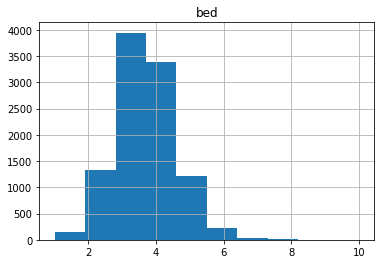

bath


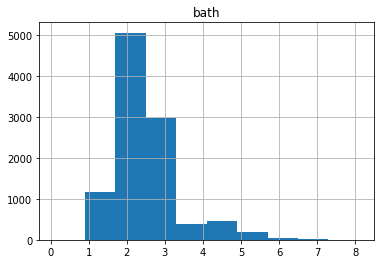

price


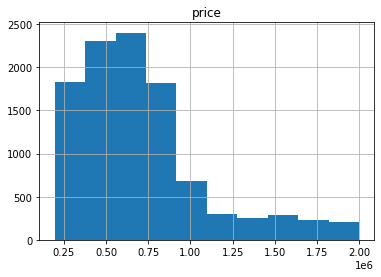

sqft


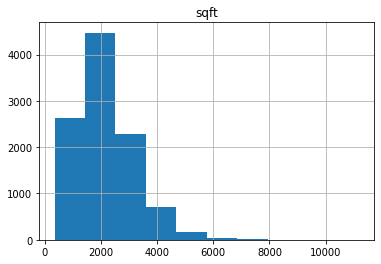

ppsqft


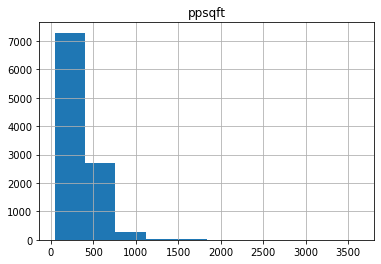

bbr


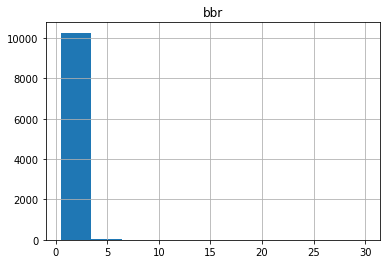

In [89]:
for col in df:
  if 'city_num' in col:
    continue
  else:
    print(col)
    df.hist(column=col)
    plt.show()

As you can see, pretty much all but city_num mimic a normal distribution, we should therfore standardize our data.

bed


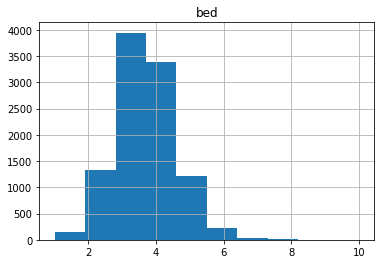

bath


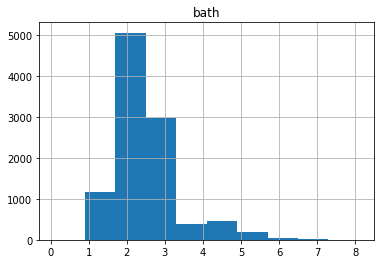

sqft


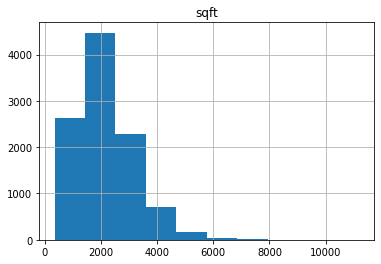

ppsqft


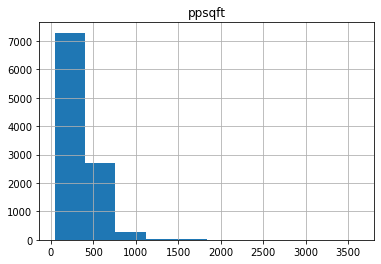

bbr


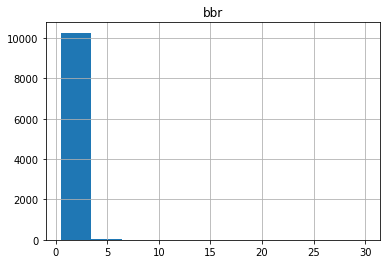

In [90]:
# Let's do the rest
for col in df:
    if 'city_num' in col or col == 'price': 
        # We don't want to standardize city_num, since these are categories.
        # or price since it's our target
        continue
    standardize_col(df[col])
    print(col)
    df.hist(column=col)
    plt.show()

Now we are ready to use this data!